In [1]:
##########################################################################
# Created on Sat Nov 07 15:27:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 8.3.3.Geometric Brownian Motion

Stochastic process model of stock price\
$$dS=\mu Sdt+\sigma Sdx\tag{8-38}$$\
Divide both sides by S\
$$\frac{dS}{S}=\mu dt+\sigma dx\tag{8-39}$$\
where,\
S:stock price\
$\mu$:expected return rate\
$\sigma$:volatility of return

Rewrite (8-39) in discrete time formate\
$$\frac{\Delta S}{S}=\mu \Delta t+\sigma\Delta x=\mu \Delta t+\sigma\varepsilon\sqrt{\Delta t}\Longrightarrow \Delta S=\mu S \Delta t+\sigma S \varepsilon\sqrt{\Delta t}\tag{8-40~8-42}$$

Since $\varepsilon \sim N[0,1]$, return of stock $\Delta S/S \sim N[\mu \Delta t,\sigma \sqrt{\Delta t}]$

The Euler discrete method is used to transform (8-42 )into the following difference equation\
$$S_t=S_{t-\Delta t}e^{\left(\mu - \frac{1}{2}{\sigma}^2\right)\Delta t+\sigma\varepsilon _t\sqrt{\Delta t}}\tag{8-43}$$

In [2]:
import pandas as pd
import numpy as np

S=pd.read_excel('CMB daily(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
R=np.log(S/S.shift(1))
mu=R.mean()*252 #annual return rate
mu=float(mu)
print('Annual return rate of CMB is ',round(mu,6))

Annual return rate of CMB is  0.136406


In [3]:
sigma=R.std()*np.sqrt(252) #annual volatility
sigma=float(sigma)
print('Annual volatility of CMB is ',round(sigma,6))

Annual volatility of CMB is  0.285664


In [8]:
import numpy.random as npr

date=pd.date_range(start='2021-01-04',end='2023-12-31',freq='B')
N=len(date)
I=500 #Number of simulation path(random sampling times)
dt=1.0/252
S_GBM=np.zeros((N,I))
S_GBM[0]=43.17 #Close price on 2021/01/04

for t in range(1,N):
    epsilon=npr.standard_normal(I)
    S_GBM[t]=S_GBM[t-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*epsilon*np.sqrt(dt))
S_GBM=pd.DataFrame(S_GBM,index=date)
S_GBM.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2021-01-04,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,...,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000,43.170000
2021-01-05,43.434871,42.755907,42.060183,43.270153,42.728273,44.589194,43.999611,42.625268,43.700728,42.926395,...,43.406615,44.147244,41.484070,44.261511,43.520104,43.443716,42.669366,42.744804,43.989176,42.711922
2021-01-06,42.983221,43.622485,41.160109,43.417646,41.979839,44.101878,43.749410,42.161939,43.979331,43.421151,...,44.631906,43.814412,41.159622,44.776675,43.361378,43.203614,42.440478,42.695469,44.499919,42.809116
2021-01-07,42.200743,44.634064,41.894613,42.914245,42.168552,44.188075,44.381629,41.610923,44.416567,44.268985,...,44.456632,42.893239,41.224863,44.003385,44.276817,43.380870,42.412049,41.980792,44.150190,41.957553
2021-01-08,42.649164,45.062545,41.567987,41.928612,42.134013,45.060924,44.717270,42.023869,44.080396,43.353578,...,42.370065,42.722641,42.592714,42.466821,44.945610,42.216431,41.557713,43.006314,44.059159,41.720761


In [9]:
S_GBM.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2023-12-25,90.695877,77.175422,151.499987,110.259164,148.188293,34.905801,29.704540,30.031825,50.408168,35.864879,...,28.932584,79.425279,30.193875,39.875942,93.582319,64.278866,131.665532,36.165825,50.851862,58.216245
2023-12-26,87.786623,75.190900,156.335589,111.349045,145.788040,34.459935,28.870309,29.669452,50.032698,35.801021,...,28.638669,80.016019,30.164074,39.712927,92.778612,61.539520,132.425807,37.940591,50.563541,58.490847
2023-12-27,86.877806,75.653808,156.346378,112.091668,147.800922,33.354440,29.151776,28.867557,49.196455,36.118793,...,29.154472,78.058494,29.936545,39.869033,94.568422,62.970425,132.907217,36.576883,49.909762,57.122103
2023-12-28,87.800808,77.622802,155.444140,113.998393,145.487943,33.460911,29.011809,29.320306,49.307134,36.166103,...,29.769939,78.612702,29.783505,39.488483,95.469953,62.054550,136.482995,36.232009,49.489783,58.674433
2023-12-29,89.285546,76.166266,157.493326,113.346517,150.173617,33.362658,27.573198,29.361094,49.051800,36.877557,...,29.802897,81.189074,29.989571,38.299256,96.315176,61.231630,136.957385,35.419384,51.655215,58.141918


In [10]:
S_GBM.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,68.496618,54.942296,84.757933,61.722461,92.574805,46.466269,30.114571,45.986347,45.419950,46.675309,...,40.131257,59.925178,40.465018,44.179072,64.086048,50.129721,83.379112,33.898973,56.222444,45.085807
std,13.811767,13.442131,33.211812,24.011095,29.868203,9.787131,6.094485,7.084204,3.856142,7.866403,...,5.694631,15.451956,7.126461,4.181242,21.844772,8.604460,38.663986,3.849175,6.627676,6.897614
min,39.563463,38.904522,35.631668,38.639639,40.098418,27.910852,21.328300,28.867557,38.069928,34.175979,...,28.254745,37.787932,24.607359,36.091033,35.500133,35.361266,37.308943,27.150031,42.177344,34.235484
25%,57.461806,45.351708,47.780670,44.477107,64.331194,40.764594,25.672346,41.167469,42.421991,39.458347,...,35.491703,45.526107,36.106743,41.043456,42.345948,42.960600,44.726876,30.786781,51.349543,40.657243
50%,72.774671,48.055891,95.880416,51.302307,103.472818,44.709274,28.081985,45.473272,44.400322,46.541649,...,39.323123,53.965925,42.772009,43.405274,60.040993,48.299575,73.411645,33.636355,56.347793,43.261168
75%,78.658833,65.460386,107.694265,79.413696,112.015541,53.505457,34.991978,50.717664,48.292785,53.275246,...,44.703762,75.612353,45.643857,46.982290,87.664718,56.943203,117.129721,36.588041,61.724666,46.696526
max,94.137862,93.330923,157.493326,120.353216,157.587330,65.831286,45.501327,64.453551,56.409643,63.773113,...,55.018045,86.954481,53.063476,55.462556,102.998240,68.954586,173.706455,46.607499,69.828969,66.169073


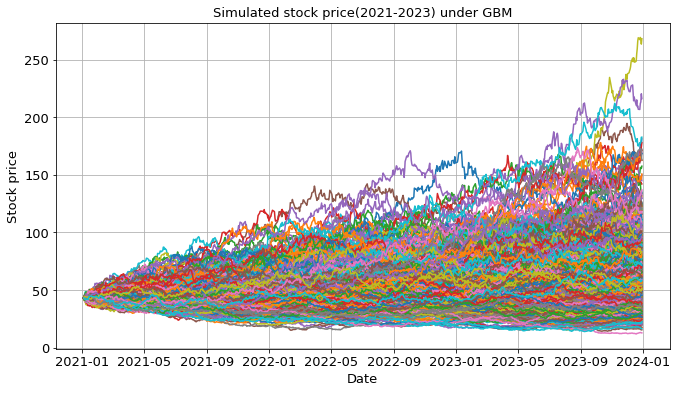

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
plt.plot(S_GBM)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Simulated stock price(2021-2023) under GBM',fontsize=13)
plt.grid()
plt.show()

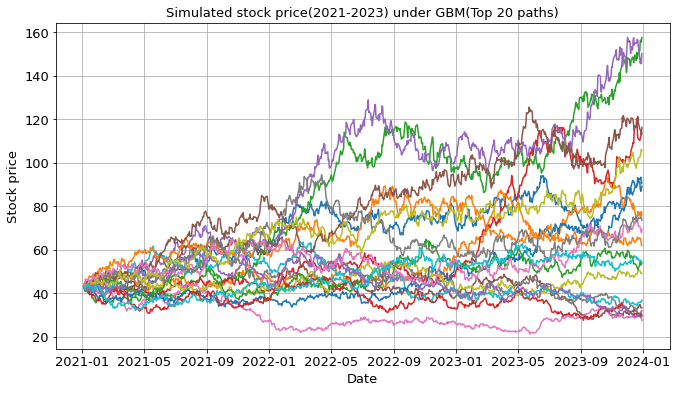

In [13]:
plt.figure(figsize=(11,6))
plt.plot(S_GBM.iloc[:,0:20])
plt.xlabel('Date',fontsize=13)
plt.ylabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Simulated stock price(2021-2023) under GBM(Top 20 paths)',fontsize=13)
plt.grid()
plt.show()